<h1>importing libraries</h1>

In [33]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk

<h2>Reading the dataset</h2>

In [34]:
meal_train=pd.read_csv("train.csv")
meal_test=pd.read_csv("test.csv")

<h2>Exploratory Data Analysis</h2>

In [35]:
meal_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [36]:
meal_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [37]:
meal_train['base_price'].describe()

count    456548.000000
mean        354.156627
std         160.715914
min          55.350000
25%         243.500000
50%         310.460000
75%         458.870000
max         866.270000
Name: base_price, dtype: float64

In [38]:
meal_train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

<h4>Reading and merging csv files</h4>

In [39]:
meal_info=pd.read_csv("meal_info.csv")
center_info=pd.read_csv("fulfilment_center_info.csv")


In [40]:
meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [41]:
center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [42]:
meal_train_info= pd.merge(meal_train, meal_info, on="meal_id", how="outer")

In [43]:
meal_train_info_merged= pd.merge(meal_train_info, center_info, on="center_id", how="outer")

In [44]:
meal_train_info_merged

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


<h4>Dropping columns</h4>

In [45]:
meal_train_info_merged.drop(['center_id','meal_id'],axis=1)

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


In [46]:
meal_cols=meal_train_info_merged.columns.tolist()

In [47]:
meal_cols

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'category',
 'cuisine',
 'city_code',
 'region_code',
 'center_type',
 'op_area']

In [48]:
meal_cols=meal_cols[:2]+meal_cols[9:]+meal_cols[7:9]+meal_cols[2:7]
print(meal_cols)

['id', 'week', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area', 'homepage_featured', 'num_orders', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion']


In [49]:
meal_train_info_merged=meal_train_info_merged[meal_cols]

In [50]:
meal_train_info_merged.dtypes

id                         int64
week                       int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
homepage_featured          int64
num_orders                 int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
dtype: object

<h4>Label Encoding</h4>

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
lb=LabelEncoder()
meal_train_info_merged['center_type']=lb.fit_transform(meal_train_info_merged['center_type'])

In [53]:
meal_train_info_merged['category']=lb.fit_transform(meal_train_info_merged['category'])

In [54]:
meal_train_info_merged['cuisine']=lb.fit_transform(meal_train_info_merged['cuisine'])

In [55]:
meal_train_info_merged.head()

,id,week,category,cuisine,city_code,region_code,center_type,op_area,homepage_featured,num_orders,center_id,meal_id,checkout_price,base_price,emailer_for_promotion
0,1379560,1,0,3,647,56,2,2.0,0,177,55,1885,136.83,152.29,0
1,1018704,2,0,3,647,56,2,2.0,0,323,55,1885,135.83,152.29,0
2,1196273,3,0,3,647,56,2,2.0,0,96,55,1885,132.92,133.92,0
3,1116527,4,0,3,647,56,2,2.0,0,163,55,1885,135.86,134.86,0
4,1343872,5,0,3,647,56,2,2.0,0,215,55,1885,146.50,147.50,0


In [56]:
meal_train_info_merged.shape

(456548, 15)

<h5>Data visualisation</h5>

D:\website\anacondapy\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'num_orders Distribution')

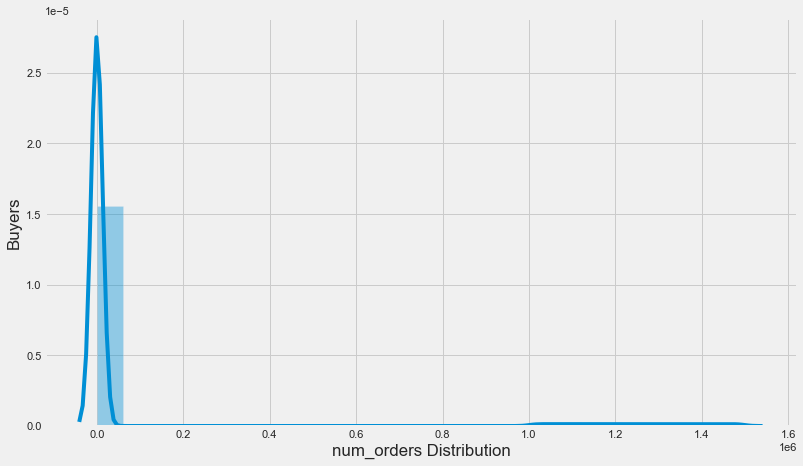

In [57]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sb.distplot(meal_train_info_merged,bins=25)
plt.ylabel("Buyers")
plt.xlabel("num_orders Distribution")

In [58]:
meal_train_info_merged_2=meal_train_info_merged.drop(['id'],axis=1)
cor=meal_train_info_merged_2.corr(method='pearson')
meal_col=cor.nlargest(8,'num_orders').index
meal_col

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

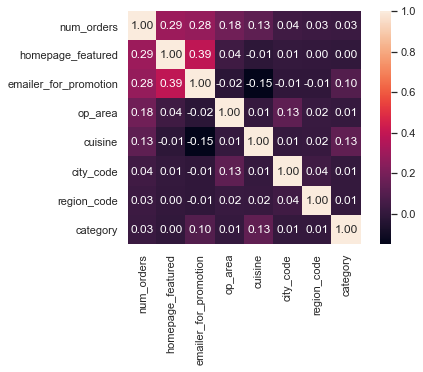

In [59]:
cor_map=np.corrcoef(meal_train_info_merged[meal_col].values.T)
sb.set(font_scale=1.0)
heatmap=sb.heatmap(cor_map,cbar=True,annot=True,square=True,fmt='.2f',yticklabels=meal_col.values,xticklabels=meal_col.values)

<h4>Splitting the dataset into Dependent and Independent</h4>

In [62]:
features=meal_col.drop(['num_orders'])
meal_train_info_merged_3=meal_train_info_merged[features]
x=meal_train_info_merged_3.values
y=meal_train_info_merged['num_orders'].values

In [63]:
meal_train_info_merged_3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.25)

# Model Building

###### Train and test Model Algorithms

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 129.8064324660328


In [67]:
L=Lasso()
L.fit(x_train,y_train)
y_pred=LR.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 129.8064324660328


In [68]:
EN=ElasticNet()
EN.fit(x_train,y_train)
y_pred=EN.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 130.91706694170338


In [69]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 62.81018506601341


In [70]:
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 66.99571498026299


In [71]:
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
y_pred=GB.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 101.43069473868611


#### Save the Model

In [ ]:
import pickle
pickle.dump(DT,open('fdemand.pkl','wb'))

#### Predicting the output using the model

In [81]:
meal_test_final=pd.merge(meal_test,meal_info,on="meal_id",how="outer")
meal_test_final=pd.merge(meal_test_final,center_info,on="center_id",how="outer")
meal_test_final=meal_test_final.drop(['meal_id','center_id'],axis=1)

meal_test_cols=meal_test_final.columns.tolist()
meal_test_cols=meal_test_cols[:2]+meal_test_cols[8:]+meal_test_cols[6:8]+meal_test_cols[2:6]
meal_test_final=meal_test_final[meal_test_cols]

lb1=LabelEncoder()
meal_test_final['center_type']=lb1.fit_transform(meal_test_final['center_type'])

meal_test_final['category']=lb1.fit_transform(meal_test_final['category'])

meal_test_final['cuisine']=lb1.fit_transform(meal_test_final['cuisine'])


x_test=meal_test_final[features].values

In [82]:
pred=DT.predict(x_test)
pred[pred<0]=0
submit=pd.DataFrame({'id':meal_test_final['id'],'num_orders':pred})

In [83]:
submit.to_csv("fooddemandmodel.csv",index=False)
submit.describe()

,id,num_orders
count,3.257300e+04,32573.000000
mean,1.248476e+06,262.483230
std,1.441580e+05,363.757916
min,1.000085e+06,15.377049
25%,1.123969e+06,63.547893
50%,1.247296e+06,148.905138
75%,1.372971e+06,318.335616
max,1.499996e+06,6250.944444


In [84]:
fd=pd.read_csv('fooddemandmodel.csv')

In [85]:
fd

,id,num_orders
0,1028232,202.608563
1,1262649,202.608563
2,1453211,202.608563
3,1262599,202.608563
4,1495848,202.608563
...,...,...
32568,1412025,50.950000
32569,1287019,179.611111
32570,1396176,50.950000
32571,1331977,50.950000
